In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [15]:
import yfinance as yf

df = yf.download("PLTR", start="2018-01-01", interval="1d")
df.reset_index(inplace=True)
df.to_csv("pltr_daily.csv", index=False)
df.head()

/tmp/ipython-input-606013856.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("PLTR", start="2018-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,PLTR,PLTR,PLTR,PLTR,PLTR
0,2020-09-30,9.50,11.41,9.11,10.00,338584400
1,2020-10-01,9.46,10.10,9.23,9.69,124297600
2,2020-10-02,9.20,9.28,8.94,9.06,55018300
3,2020-10-05,9.03,9.49,8.92,9.43,36316900
4,2020-10-06,9.90,10.18,8.90,9.04,90864000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1312 non-null   datetime64[ns]
 1   (Close, PLTR)   1312 non-null   float64       
 2   (High, PLTR)    1312 non-null   float64       
 3   (Low, PLTR)     1312 non-null   float64       
 4   (Open, PLTR)    1312 non-null   float64       
 5   (Volume, PLTR)  1312 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 61.6 KB


In [17]:
df.isna().sum()

,,0
Price,Ticker,
Date,,0
Close,PLTR,0
High,PLTR,0
Low,PLTR,0
Open,PLTR,0
Volume,PLTR,0


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [19]:
ts = df['Adj Close']

KeyError: 'Adj Close'

In [20]:
ts = df['Adj_Close']


KeyError: 'Adj_Close'

In [21]:
ts = df['AdjClose']

KeyError: 'AdjClose'

In [22]:
df.columns

MultiIndex([( 'Close', 'PLTR'),
            (  'High', 'PLTR'),
            (   'Low', 'PLTR'),
            (  'Open', 'PLTR'),
            ('Volume', 'PLTR')],
           names=['Price', 'Ticker'])

In [23]:
ts = df[('Close', 'PLTR')]

In [24]:
ts.head()

,Close
,PLTR
Date,
2020-09-30,9.50
2020-10-01,9.46
2020-10-02,9.20
2020-10-05,9.03
2020-10-06,9.90


In [25]:
df.columns = df.columns.get_level_values(0)

In [26]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [27]:
ts = df['Close']

In [28]:
df.index = pd.to_datetime(df.index)

In [29]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-09-30,9.50,11.41,9.11,10.00,338584400
2020-10-01,9.46,10.10,9.23,9.69,124297600
2020-10-02,9.20,9.28,8.94,9.06,55018300
2020-10-05,9.03,9.49,8.92,9.43,36316900
2020-10-06,9.90,10.18,8.90,9.04,90864000


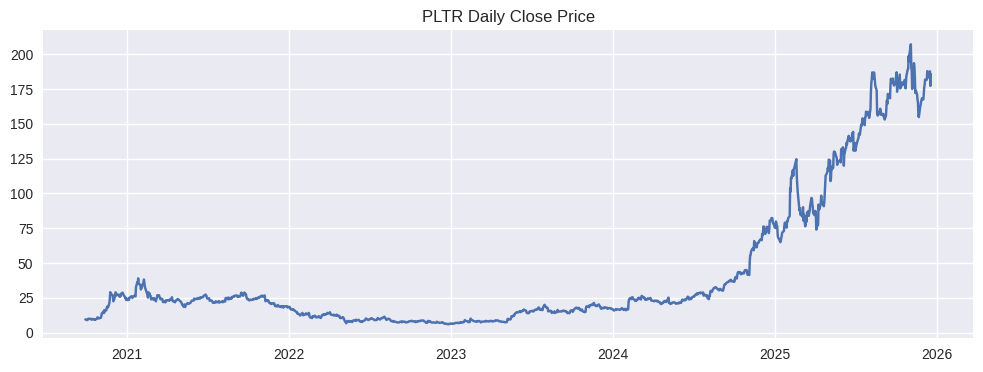

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(ts)
plt.title("PLTR Daily Close Price")
plt.show()

In [31]:
import numpy as np
ts_log = np.log(ts)
ts_return = ts_log.diff()


<Axes: title={'center': 'PLTR Daily Log Returns'}, xlabel='Date'>

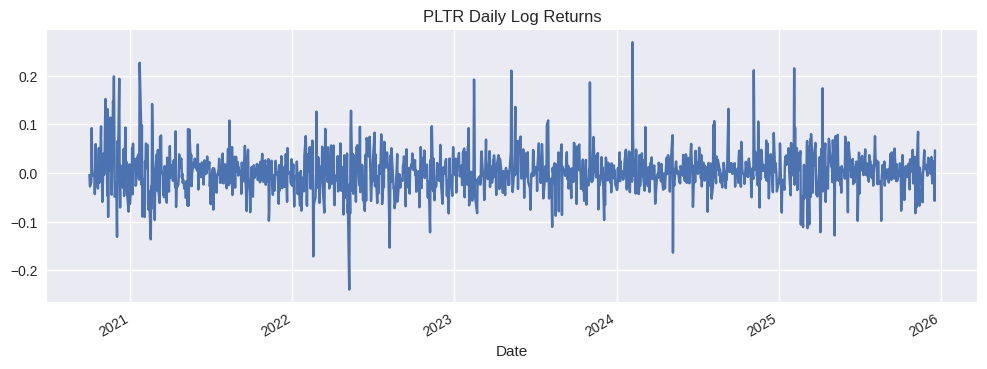

In [32]:
ts_return.dropna().plot(figsize=(12,4), title="PLTR Daily Log Returns")

In [36]:
import os

In [37]:
print("Files after save:", os.listdir())
print("File exists:", os.path.exists("pltr_ts_processed.csv"))

Files after save: ['.config', 'pltr_daily.csv', 'sample_data']
File exists: False


In [38]:
print("df exists:", 'df' in globals())
print("df shape:", df.shape)

print("Close column exists:", ('Close' in df.columns) or (('Close','PLTR') in df.columns))

df exists: True
df shape: (1312, 5)
Close column exists: True


In [39]:
# Handle both normal and MultiIndex cases
if isinstance(df.columns, pd.MultiIndex):
    ts = df[('Close', 'PLTR')]
else:
    ts = df['Close']

print("ts length:", len(ts))

ts length: 1312


In [40]:
import numpy as np

ts_log = np.log(ts)
ts_return = ts_log.diff()

print("Non-null log returns:", ts_return.dropna().shape[0])


Non-null log returns: 1311


In [41]:
import os

save_path = "/content/pltr_ts_processed.csv"

df_out = pd.DataFrame({
    "price": ts,
    "log_return": ts_return
})

df_out.to_csv(save_path)

print("Saved to:", save_path)
print("File exists now:", os.path.exists(save_path))
print("Files in /content:", os.listdir("/content"))


Saved to: /content/pltr_ts_processed.csv
File exists now: True
Files in /content: ['.config', 'pltr_ts_processed.csv', 'pltr_daily.csv', 'sample_data']
